In [71]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, \
    mean_squared_error, r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier

In [34]:
df = pd.read_csv('datasets/mental_health_diagnosis_treatment_data.csv')

In [4]:
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,NaN,Improved,10,Depressed,73
496,497,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6.0,Deteriorated,8,Happy,86
497,498,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,NaN,Deteriorated,5,Neutral,87
498,499,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6.0,Improved,7,Anxious,73


In [35]:
df.drop(columns=['Patient ID', 'Treatment Start Date'], inplace=True)

In [36]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,8,NaN,Improved,10,Depressed,73
496,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,13,6.0,Deteriorated,8,Happy,86
497,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,10,NaN,Deteriorated,5,Neutral,87
498,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,10,6.0,Improved,7,Anxious,73


In [37]:
df.isnull().sum()

Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [38]:
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                     0.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Age                           475 non-null    float64       
 1   Gender                        500 non-null    object        
 2   Diagnosis                     500 non-null    object        
 3   Symptom Severity (1-10)       500 non-null    int64         
 4   Mood Score (1-10)             500 non-null    int64         
 5   Sleep Quality (1-10)          500 non-null    int64         
 6   Physical Activity (hrs/week)  450 non-null    float64       
 7   Medication                    500 non-null    object        
 8   Therapy Type                  500 non-null    object        
 9   Treatment Start Date          500 non-null    datetime64[ns]
 10  Treatment Duration (weeks)    500 non-null    int64         
 11  Stress Level (1-10)           40

<Axes: xlabel='Outcome', ylabel='count'>

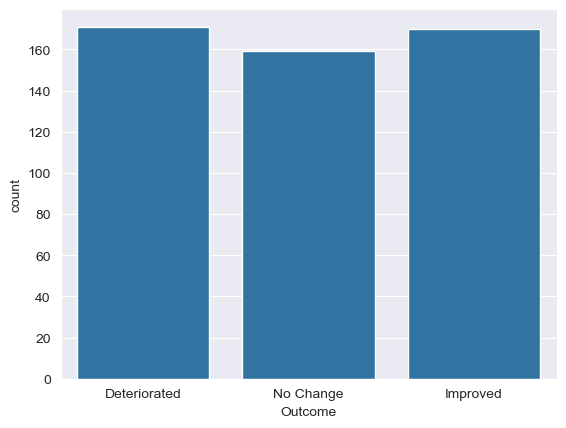

In [16]:
sns.countplot(df, x = df['Outcome'])

<Axes: >

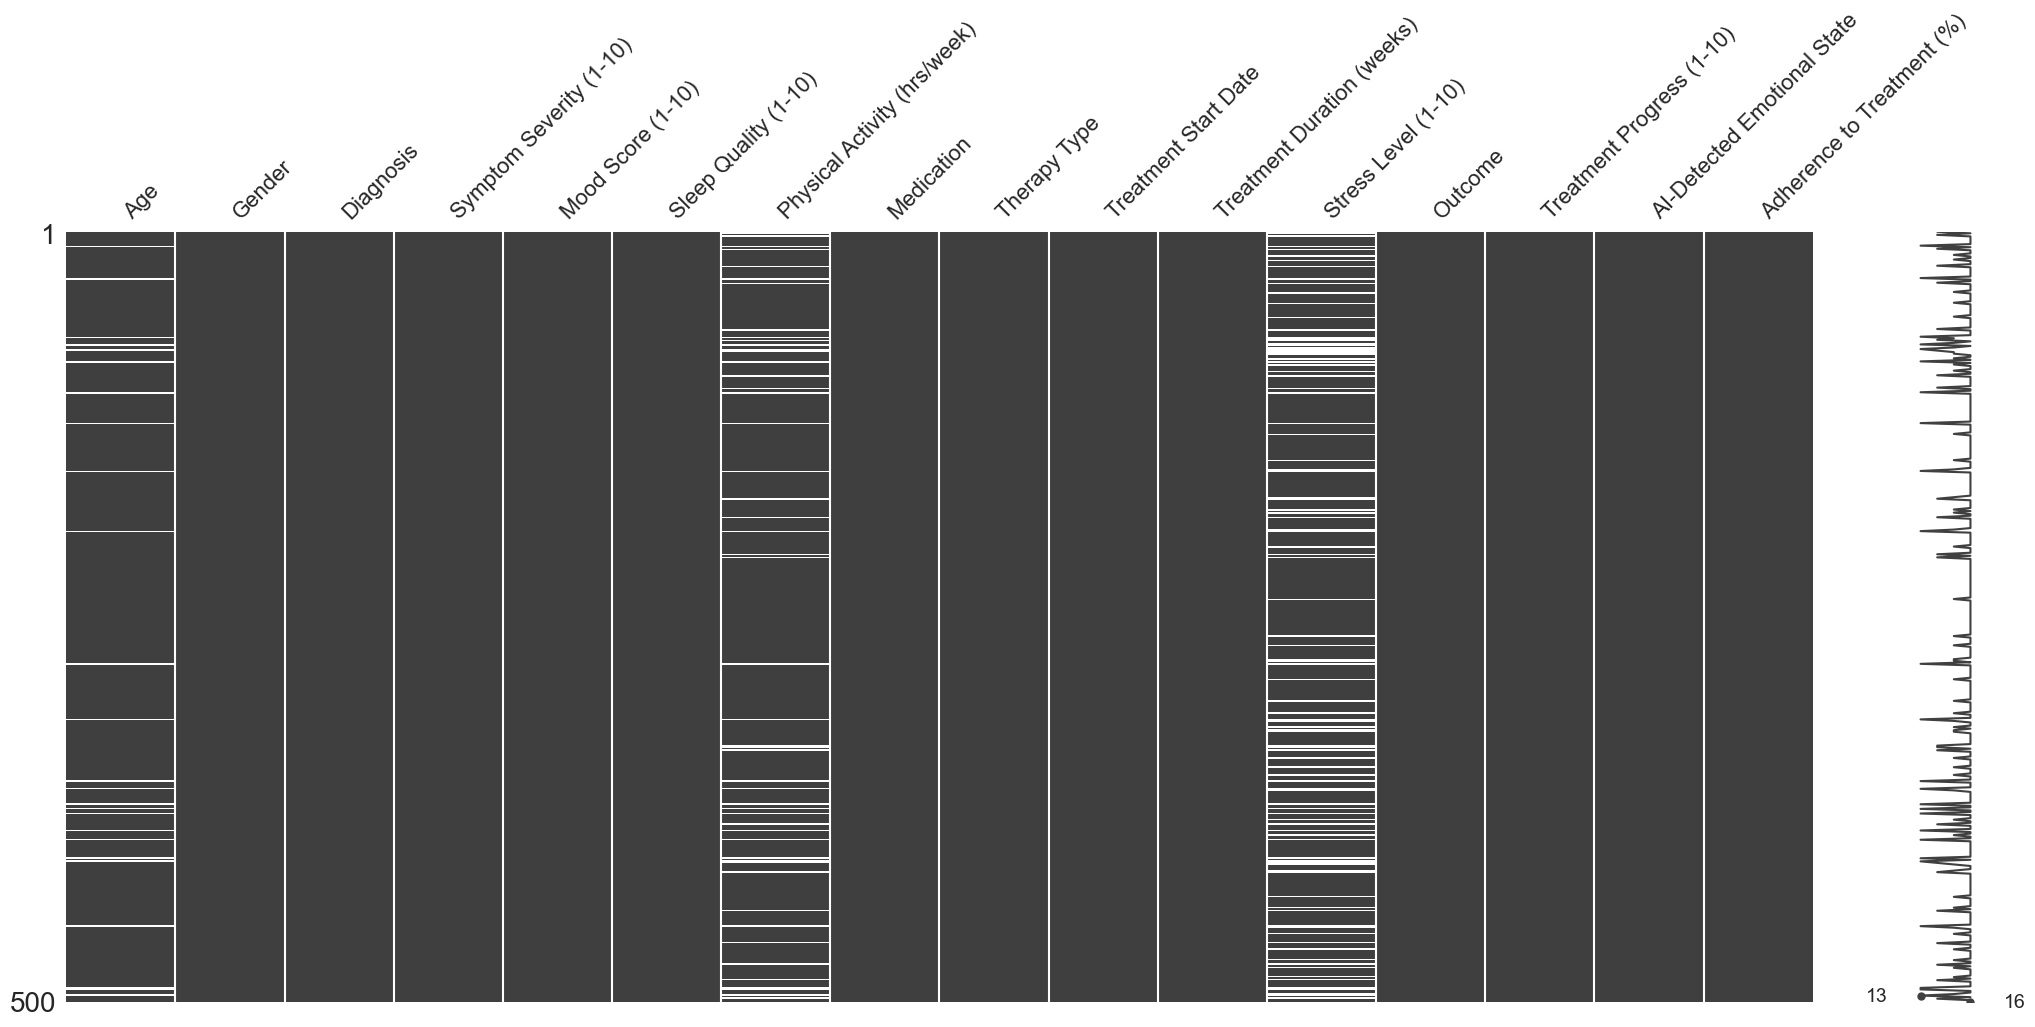

In [17]:
msno.matrix(df)

In [40]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,8,NaN,Improved,10,Depressed,73
496,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,13,6.0,Deteriorated,8,Happy,86
497,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,10,NaN,Deteriorated,5,Neutral,87
498,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,10,6.0,Improved,7,Anxious,73


In [41]:
encoder = LabelEncoder()

df['Outcome'] = encoder.fit_transform(df['Outcome'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [42]:
df_encoded = pd.get_dummies(df, columns=['Diagnosis', 'Medication', 'Therapy Type','AI-Detected Emotional State'])

In [43]:
df_encoded

,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),...,Therapy Type_Cognitive Behavioral Therapy,Therapy Type_Dialectical Behavioral Therapy,Therapy Type_Interpersonal Therapy,Therapy Type_Mindfulness-Based Therapy,AI-Detected Emotional State_Anxious,AI-Detected Emotional State_Depressed,AI-Detected Emotional State_Excited,AI-Detected Emotional State_Happy,AI-Detected Emotional State_Neutral,AI-Detected Emotional State_Stressed
0,43.0,0,10,5,8,NaN,11,NaN,0,7,...,False,False,True,False,True,False,False,False,False,False
1,40.0,0,9,5,4,7.0,11,7.0,2,7,...,False,False,True,False,False,False,False,False,True,False
2,55.0,0,6,3,4,NaN,14,NaN,0,5,...,False,False,False,True,False,False,False,True,False,False
3,34.0,0,6,3,6,5.0,8,8.0,0,10,...,False,False,False,True,False,False,True,False,False,False
4,52.0,1,7,6,6,8.0,12,5.0,0,6,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,1,10,4,8,NaN,8,NaN,1,10,...,False,True,False,False,False,True,False,False,False,False
496,22.0,1,5,6,6,7.0,13,6.0,0,8,...,False,False,False,True,False,False,False,True,False,False
497,23.0,1,7,3,4,NaN,10,NaN,0,5,...,True,False,False,False,False,False,False,False,True,False
498,48.0,1,9,4,6,9.0,10,6.0,1,7,...,False,False,False,True,True,False,False,False,False,False


In [47]:
x = df_encoded.drop(columns='Outcome')
y = df_encoded['Outcome']

In [58]:
imputer = SimpleImputer(strategy='median')

df_encoded['Age'] = imputer.fit_transform(df_encoded[['Age']])


In [61]:
knn_imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the 'Stress Level' and 'Physical Activity' columns
df_encoded[['Stress Level (1-10)', 'Physical Activity (hrs/week)']] = knn_imputer.fit_transform(df_encoded[['Stress Level (1-10)', 'Physical Activity (hrs/week)']])

In [62]:
df_encoded.isnull().sum()

Age                                            0
Gender                                         0
Symptom Severity (1-10)                        0
Mood Score (1-10)                              0
Sleep Quality (1-10)                           0
Physical Activity (hrs/week)                   0
Treatment Duration (weeks)                     0
Stress Level (1-10)                            0
Outcome                                        0
Treatment Progress (1-10)                      0
Adherence to Treatment (%)                     0
Diagnosis_Bipolar Disorder                     0
Diagnosis_Generalized Anxiety                  0
Diagnosis_Major Depressive Disorder            0
Diagnosis_Panic Disorder                       0
Medication_Antidepressants                     0
Medication_Antipsychotics                      0
Medication_Anxiolytics                         0
Medication_Benzodiazepines                     0
Medication_Mood Stabilizers                    0
Medication_SSRIs    

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
df_encoded.isnull().sum()

Age                                            0
Gender                                         0
Symptom Severity (1-10)                        0
Mood Score (1-10)                              0
Sleep Quality (1-10)                           0
Physical Activity (hrs/week)                   0
Treatment Duration (weeks)                     0
Stress Level (1-10)                            0
Outcome                                        0
Treatment Progress (1-10)                      0
Adherence to Treatment (%)                     0
Diagnosis_Bipolar Disorder                     0
Diagnosis_Generalized Anxiety                  0
Diagnosis_Major Depressive Disorder            0
Diagnosis_Panic Disorder                       0
Medication_Antidepressants                     0
Medication_Antipsychotics                      0
Medication_Anxiolytics                         0
Medication_Benzodiazepines                     0
Medication_Mood Stabilizers                    0
Medication_SSRIs    

In [77]:
models = {
    'XGBClassifier' : XGBClassifier(n_estimators = 200, n_jobs = -1, max_depth = 50, learning_rate = 0.1 ),
    #'KNN' : KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
}

for name, model in models.items():
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print(f'\n{name} Evaluation')
    print(classification_report(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='macro'))
    print(accuracy_score(y_test, y_pred))


XGBClassifier Evaluation
              precision    recall  f1-score   support

           0       0.42      0.33      0.37        40
           1       0.34      0.39      0.36        31
           2       0.35      0.41      0.38        29

    accuracy                           0.37       100
   macro avg       0.37      0.38      0.37       100
weighted avg       0.38      0.37      0.37       100

0.37026197589577875
0.37

DecisionTreeClassifier Evaluation
              precision    recall  f1-score   support

           0       0.32      0.25      0.28        40
           1       0.26      0.35      0.30        31
           2       0.27      0.24      0.25        29

    accuracy                           0.28       100
   macro avg       0.28      0.28      0.28       100
weighted avg       0.29      0.28      0.28       100

0.2778442975626074
0.28

RandomForestClassifier Evaluation
              precision    recall  f1-score   support

           0       0.35      0.15     

In [86]:
xgb = XGBClassifier(n_estimators=300, max_depth=30, random_state=42)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [87]:
y_pred = xgb.predict(x_test)

In [88]:
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.23      0.26        40
           1       0.35      0.42      0.38        31
           2       0.29      0.34      0.32        29

    accuracy                           0.32       100
   macro avg       0.32      0.33      0.32       100
weighted avg       0.32      0.32      0.31       100

0.3202276079513931
0.32


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [90]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [98]:
param_grid = {
    'n_estimators' : [200,300,400],
    'max_depth' : [30,40,50],
   
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1 )

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [30, 40, 50],
                         'n_estimators': [200, 300, 400]})

In [99]:
print(grid_search.best_params_)

{'max_depth': 30, 'n_estimators': 200}


In [100]:
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

In [101]:
print(grid_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [105]:
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.39      0.37        18
           1       0.31      0.22      0.26        18
           2       0.47      0.57      0.52        14

    accuracy                           0.38        50
   macro avg       0.38      0.39      0.38        50
weighted avg       0.37      0.38      0.37        50

0.3808715336728919
0.38
